5 basic steps for Data analysis:
             
1. Define the problem
2. Collect data
3. Prepare data
4. Analyse data
5. Interpret results

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import builtins
import rich
builtins.print = rich.print
# Set the style for plotting
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
df = pd.read_csv("../data/netflix_titles.csv")

## Task 0: Clean Dataset
1. There are some values in the column "country" that aren't formatted correctly, "contry_name1," not "country_name1, country_name2"

In [ ]:
# 1 example the issue:
df[df.title == 'The Present']

Solution: Reformat all values

In [ ]:
# Iterate through all values of the 'country' column to re-format wrong values
for id, country_names in enumerate(df.country):
    # Ignore where the value is nan
    if isinstance(country_names, float):
        continue
    # Check if the last character of the string is a comma and remove it
    elif country_names[-1] == ",":
        # Update the dataframe directly by removing the trailing comma
        df.loc[df['country'] == country_names, 'country'] = country_names[:-1]

In [ ]:
# After addressing the issue
df[df.title == 'The Present']

## Task 1: Transform the initial table

- Initially, each row is for one movie, available in potentially MANY countries.
- For easier analsys concerning country, we want each row for a movie in a single country
- In other words, one row of the initial table corresponds to multiple rows in the new table

In [ ]:
df_split_country = df.assign(country=df["country"].str.split(", ")).explode("country")

In [ ]:
df_split_country.head()

In [ ]:
df_split_country[df_split_country.title == 'Zak Storm']

In [ ]:
df_split_country.duplicated()

In [ ]:
df_split_country = df_split_country.dropna()
df_split_country[df_split_country['country'].str.contains(",")]

## Task 2: List all TV-Shows

Given the dataset, I will filter out by column type

In [5]:
df_tv_show = df.query('type == "TV Show"')
df_tv_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


## Task 3: Type Distribution

Target result: a bar plot
- x-axis: Type name
- y-axis: no. type

In [ ]:
df.type.value_counts()

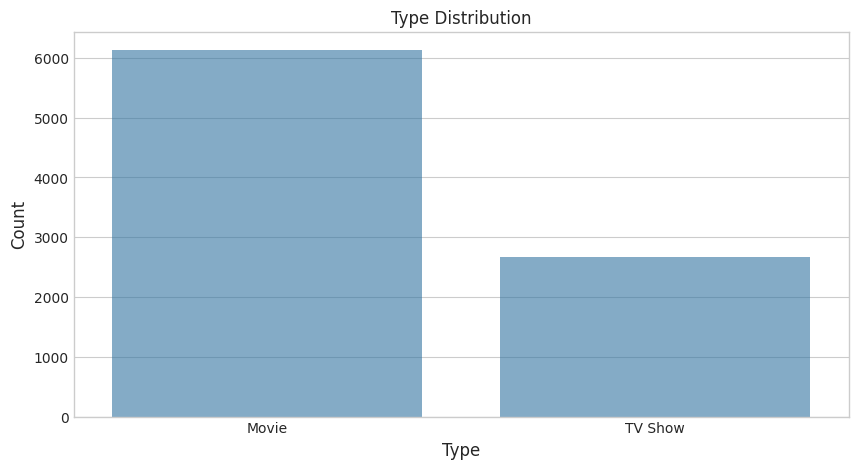

In [3]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'type', data= df, alpha= 0.6)
plt.title('Type Distribution')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Type', fontsize=12)

plt.savefig('../results/type_distribution.png')
plt.show()
plt.close()

## Task 4: Rating Distribution

In [8]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In the 'rating' column, there are some values that are "74 min", "84 min", ..., which should be in the duration column.
Therefore we need to clean the dataset again to use: Change the wrong data to "Unknown"

In [3]:
df_rating_clean = df.copy()
df_rating_clean.loc[df_rating_clean['rating'].str.contains('min', na=False), 'rating'] = 'unknown'

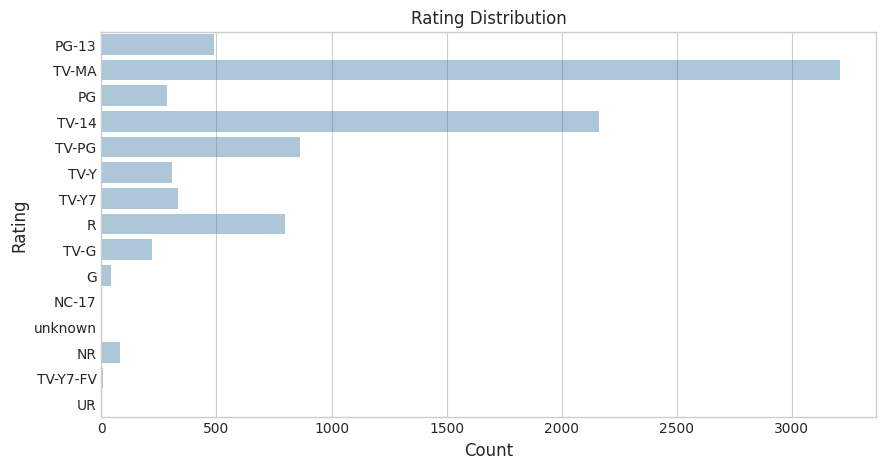

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(y = 'rating', data= df_rating_clean, alpha= 0.4)
plt.title('Rating Distribution')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Rating', fontsize=12)

plt.savefig('../results/rating_distribution.png')
plt.show()
plt.close()

## Task 5: Genre Distribution

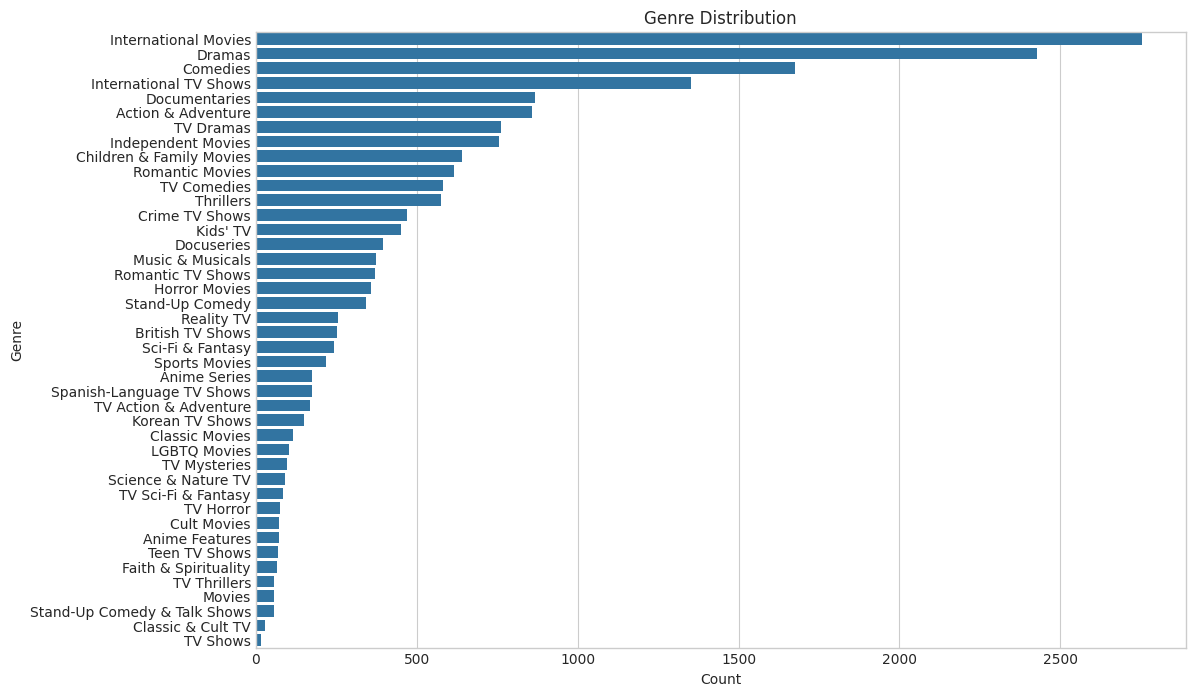

In [5]:
genre_count = df['listed_in'].str.split(', ').explode().value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=genre_count.index, x=genre_count.values)
plt.title('Genre Distribution')
plt.ylabel('Genre')
plt.xlabel('Count')

plt.savefig('../results/genre_distribution.png')
plt.show()
plt.close()

## Task 6: How many movies and TV-shows are available in each country?

Target result: a bar plot:
- x-axis: country name
- y-axis: no. movies and TV-shows

I want a table with 2 columns
1. country
2. Count of movies and TV-shows available in that country

Approach: create a dictionary with
key: country name
value: count of movies and tv-shows

In [ ]:
# Remove nan values
df = df.dropna()

# A dictionary
# key: country name
# value: count of movies and tv-shows
dict_country_cnt = {}

# Iterate through the array df.country.unique()
for id_country, country_names in enumerate(df.country.unique()):
    # If country_names == nan, skip
    if isinstance(country_names, float):
        continue

    # If it is available in many countries, split the string
    for country_name in country_names.split(', '):
        # If the country_name is already in dict_country_cnt.keys(), skip
        if country_name in list(dict_country_cnt.keys()):
            continue
        # else, save it in the list
        else:
            dict_country_cnt[country_name] = 0

# For each country, count movies that are available in that country
for country_name in dict_country_cnt.keys():
    filtered_df = df[df['country'].str.contains(country_name)]
    dict_country_cnt[country_name] = len(filtered_df.index)

In [ ]:
del dict_country_cnt['']

dict_country_cnt = sorted(dict_country_cnt.items(), key=lambda x:x[1], reverse=True)
dict_country_cnt = dict(dict_country_cnt)

# Prepare the data
df_new = pd.DataFrame(dict_country_cnt.items(), columns=['country', 'cnt'])

sns.set_theme(rc={'figure.figsize':(7,22)})
sns.barplot(df_new, y="country", x='cnt')

plt.savefig('../results/barplot_country_no_movies.png')

plt.show()
plt.close()

## Task 7: In the top 5 countries with the highest number of available movies and TV-shows, show the percentage (or number) of movies versus TV-shows
Target result: a bar plot
- x-asis: Top 5 country names
- y-asis: no. or percentage of movies and TV-Shows

We need a table with 2 columns (no. Movies and no. TV-Shows) along with 5 rows as 5 top countries

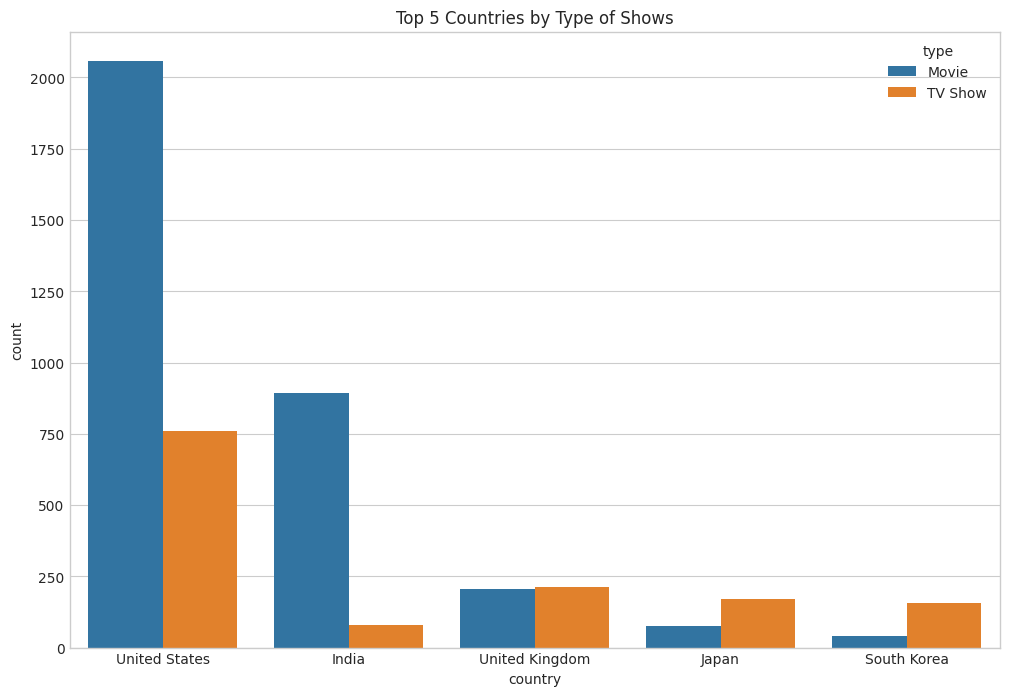

In [6]:
plt.figure(figsize=(12, 8))
sns.countplot(x='country', hue='type', data=df, order=df['country'].value_counts().index[:5])
plt.title('Top 5 Countries by Type of Shows')

plt.savefig('../results/top5_country_type.png')
plt.show()
plt.close()

## Task 8: In USA, is there any trend on no. movies & TV-shows release over the years

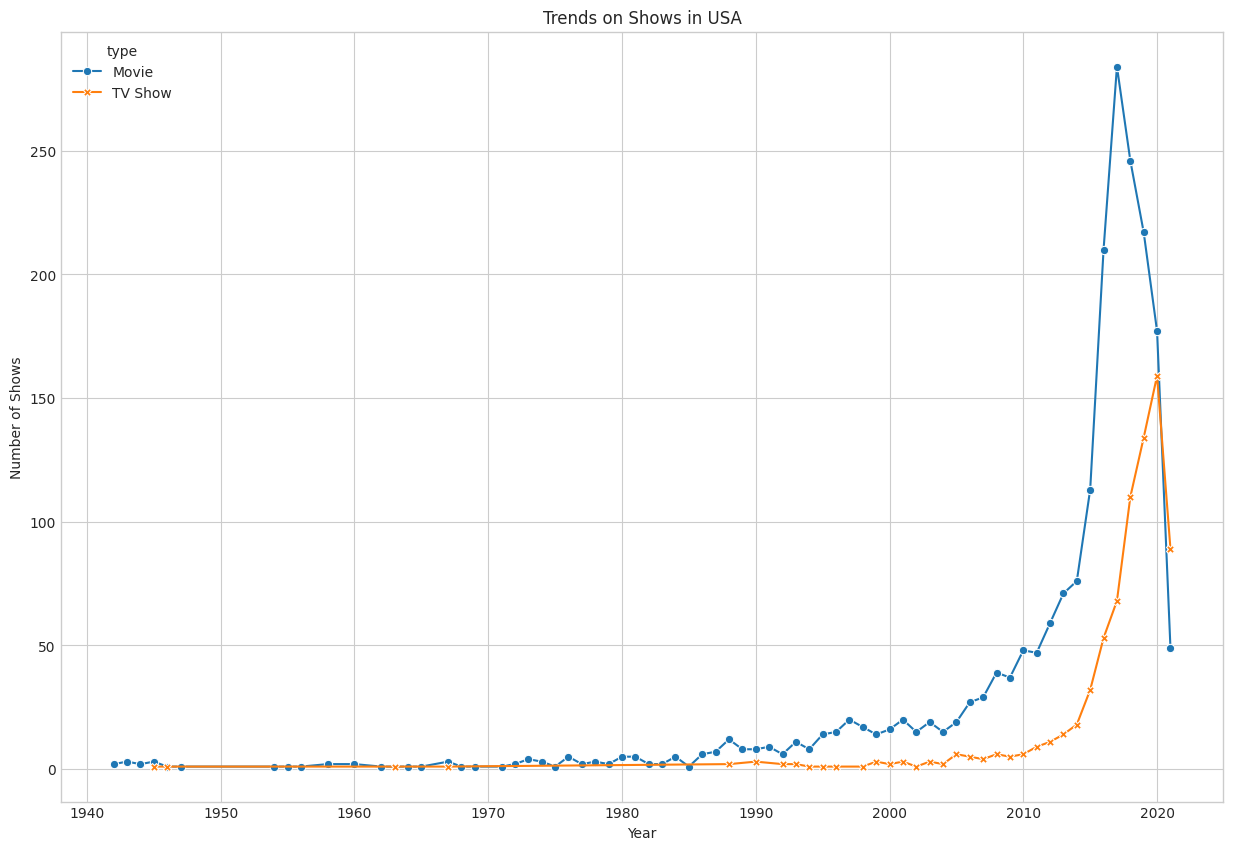

In [7]:
shows_per_year = df.loc[df['country'] == 'United States']
shows_per_year = shows_per_year.groupby(['type','release_year']).size().reset_index(name='counts')
# shows_per_year.head()
plt.figure(figsize=(15, 10))
sns.lineplot(data=shows_per_year, x='release_year', y='counts', hue='type', style='type', markers=True, dashes=False)
plt.title('Trends on Shows in USA')
plt.xlabel('Year')
plt.ylabel('Number of Shows')

plt.savefig('../results/trend_release_year_usa.png')
plt.show()
plt.close()

## Task 9: In USA, is there any trend on the duration of movies & TV-shows?

In [12]:
duration_trend = df.loc[df['country'] == 'United States']
duration_trend.head()

# plt.figure(figsize=(15, 10))
# sns.lineplot(data=duration_trend, x='duration', y='counts', hue='type', style='type', markers=True, dashes=False)
# plt.title('Trends on Duration of Shows in USA')
# plt.xlabel('Duration (mins)')
# plt.ylabel('Number of Shows')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...


## Task 10: Create WordCloud for each Genre of Show

In [9]:
df['genre'] = df['listed_in'].str.split(', ')
df = df.explode('genre')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Dramas
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows


In [ ]:
from math import ceil
from wordcloud import WordCloud, STOPWORDS

# Define stop words
stop_words = set(STOPWORDS)

# Function to generate a word cloud for a given genre
def generate_wordcloud(dataframe, genres, stopwords=stop_words):
    if isinstance(genres, list):
        text = ' '.join(x for x in dataframe[dataframe['genre'].isin(genres)].description)
    else:
        text = ' '.join(x for x in dataframe[dataframe['genre'] == genres].description)
    return WordCloud(stopwords=stopwords, width=800, height=400, background_color='white').generate(text)

# Prepare data for the word clouds
wordclouds = [
    ("Dramas", generate_wordcloud(df, 'Dramas')),
    ("Comedies", generate_wordcloud(df, 'Comedies')),
    ("Documentaries", generate_wordcloud(df, 'Documentaries')),
    ("Thrillers & Horror Movies", generate_wordcloud(df, ['Thrillers', 'Horror Movies'])),
    ("Action & Adventure", generate_wordcloud(df, 'Action & Adventure'))
]

# Calculate the number of rows and columns
n_cols = ceil(len(wordclouds) / 3)  # Number of columns per row
n_rows = 3  # Fixed number of rows

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 18))
axes = axes.flatten()  # Flatten to make iteration easier

# Plot each word cloud
for ax, (title, wordcloud) in zip(axes, wordclouds):
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title)
    ax.title.set_size(20)

# Hide any extra subplots (if grid is larger than needed)
for ax in axes[len(wordclouds):]:
    ax.axis('off')

plt.tight_layout()
plt.savefig('../results/genre_wordcloud.png')
plt.show()
plt.close()
